In [1]:
import requests

url = 'http://www.northwestknowledge.net/metdata/data/vs_2001.nc' 
filename = 'vs_2001.nc'

response = requests.get(url)
with open(filename, 'wb') as f:
    f.write(response.content)

In [2]:
import xarray as xr

ds = xr.open_dataset('vs_2001.nc')
ds

<xarray.Dataset> Size: 2GB
Dimensions:     (lon: 1386, lat: 585, day: 365, crs: 1)
Coordinates:
  * lon         (lon) float64 11kB -124.8 -124.7 -124.7 ... -67.14 -67.1 -67.06
  * lat         (lat) float64 5kB 49.4 49.36 49.32 49.28 ... 25.15 25.11 25.07
  * day         (day) datetime64[ns] 3kB 2001-01-01 2001-01-02 ... 2001-12-31
  * crs         (crs) uint16 2B 3
Data variables:
    wind_speed  (day, lat, lon) float64 2GB ...
Attributes: (12/19)
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.6
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    ...                         ...
    date:                       03 July 2019
    note1:                      The projection information for this file is: ...
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

In [3]:
point = ds['wind_speed'].sel(
    lat=38.0, lon=-97.0, day='2001-07-01', method='nearest'
)

point.item()

2.8000000000000003

In [1]:
import fsspec

# Connect to the OSN Pod (S3-compatible public storage)
fs = fsspec.filesystem('s3', anon=True, endpoint_url='https://usgs.osn.mghpcc.org/')

# List the root directory
fs.ls('mdmf/')

['mdmf/', 'mdmf/gdp', 'mdmf/mdmf', 'mdmf/ngwm', 'mdmf/wwatkins']

In [2]:
fs.ls('mdmf/gdp/')


['mdmf/gdp/5m_rcp45_G0.6SW_S0.15m_wMeta.zarr',
 'mdmf/gdp/5m_rcp45_G0.6SW_wMeta.zarr',
 'mdmf/gdp/5m_rcp45_G1.2SW_S0.15m_wMeta.zarr',
 'mdmf/gdp/5m_rcp45_G1.2SW_wMeta.zarr',
 'mdmf/gdp/5m_rcp45_G1.8SW_S0.15m_wMeta.zarr',
 'mdmf/gdp/5m_rcp45_G1.8SW_wMeta.zarr',
 'mdmf/gdp/5m_rcp85_G0.6SW_S0.15m_wMeta.zarr',
 'mdmf/gdp/5m_rcp85_G0.6SW_wMeta.zarr',
 'mdmf/gdp/5m_rcp85_G1.2SW_S0.15m_wMeta.zarr',
 'mdmf/gdp/5m_rcp85_G1.2SW_wMeta.zarr',
 'mdmf/gdp/5m_rcp85_G1.8SW_S0.15m_wMeta.zarr',
 'mdmf/gdp/5m_rcp85_G1.8SW_wMeta.zarr',
 'mdmf/gdp/CooperMcKenzie.zarr',
 'mdmf/gdp/CooperUpperDeschutes.zarr',
 'mdmf/gdp/GMO.zarr',
 'mdmf/gdp/GMO_New.zarr',
 'mdmf/gdp/LOCA2',
 'mdmf/gdp/LOCA_future.zarr',
 'mdmf/gdp/LOCA_historical.zarr',
 'mdmf/gdp/NHM_CCSM4_daily.zarr',
 'mdmf/gdp/NHM_CCSM4_hourly.zarr',
 'mdmf/gdp/NHM_CCSM4_monthly.zarr',
 'mdmf/gdp/NHM_GFDL_daily.zarr',
 'mdmf/gdp/NHM_GFDL_hourly.zarr',
 'mdmf/gdp/NHM_GFDL_monthly.zarr',
 'mdmf/gdp/PRISM.zarr',
 'mdmf/gdp/PRISM_v2.zarr',
 'mdmf/gdp/RSM_CC

In [19]:
import fsspec
import xarray as xr
from zarr.storage import FSStore  # Now this should work

fs = fsspec.filesystem('s3', anon=True, endpoint_url='https://usgs.osn.mghpcc.org/')
zarr_path = 'mdmf/gdp/ssebopeta_daily.zarr'

store = FSStore(zarr_path, fs=fs)
ds = xr.open_zarr(store, consolidated=True)
ds

<xarray.Dataset> Size: 1TB
Dimensions:      (time: 9010, lat: 2643, lon: 6165)
Coordinates:
  * lat          (lat) float64 21kB 49.5 49.49 49.48 49.47 ... 24.02 24.01 24.0
  * lon          (lon) float64 49kB -126.0 -126.0 -126.0 ... -66.52 -66.51 -66.5
  * time         (time) datetime64[ns] 72kB 2000-01-01 2000-01-02 ... 2024-08-31
Data variables:
    ET           (time, lat, lon) float64 1TB ...
    spatial_ref  int64 8B ...
Attributes:
    AREA_OR_POINT:  Area
    DataType:       Generic

In [20]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"C:\Users\enemy\AppData\Roaming\gcloud\application_default_credentials.json"

In [21]:
import gcsfs
import pandas as pd

# Create GCS filesystem object
fs = gcsfs.GCSFileSystem()

# Your file path in GCS
csv_path = 'gs://data_housee/emission_data/emissions_2010.csv'

# Open securely and read with pandas
with fs.open(csv_path, 'rb') as f:
    df = pd.read_csv(f)

df.head()

_request non-retriable exception: Anonymous caller does not have storage.objects.get access to the Google Cloud Storage object. Permission 'storage.objects.get' denied on resource (or it may not exist)., 401
Traceback (most recent call last):
  File "C:\Users\enemy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\gcsfs\retry.py", line 135, in retry_request
    return await func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\enemy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\gcsfs\core.py", line 474, in _request
    validate_response(status, contents, path, args)
  File "C:\Users\enemy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\gcsfs\retry.py", line 122, in validate_response
    raise HttpError(error)
gcsfs.retry.HttpError: Anonym

HttpError: Anonymous caller does not have storage.objects.get access to the Google Cloud Storage object. Permission 'storage.objects.get' denied on resource (or it may not exist)., 401

In [1]:
import pandas as pd

weather_df = pd.read_csv('combined_2011.csv')
emissions_df = pd.read_csv('emissions_uncertainty_2011.csv')

print("Weather Data:")
display(weather_df.head())

print("Emissions Data:")
display(emissions_df.head())

Weather Data:


,longitude,latitude,rmax,vs,tmmx,bi,etr,rmin,pr,vpd,pet,th,tmmn,sph,srad
0,-124.7875,48.129167,784,53,587,3,18,478,0,27,10,75,624,289,670
1,-124.7875,48.170833,785,53,584,3,18,480,0,27,10,77,622,285,677
2,-124.7875,48.212500,796,52,581,3,16,498,0,25,9,77,621,287,684
3,-124.7875,48.337500,793,51,575,3,15,530,0,23,8,81,624,293,683
4,-124.7875,48.379167,764,51,576,3,16,512,0,25,9,81,628,288,682


Emissions Data:


,id,year,doy,fuelcode,grid10k,longitude,latitude,area_burned,con.q5,con.q10,...,ch4.q75,ch4.q90,ch4.q95,pm.q5,pm.q10,pm.q25,pm.q50,pm.q75,pm.q90,pm.q95
0,0,2011,97,1,4536,-81.0394,25.1903,62500.0,189.381504,204.031384,...,0.752573,0.835135,0.868337,1.966058,2.140409,2.42611,2.667173,2.963049,3.190943,3.359932
1,1,2011,97,1600,4536,-81.0370,25.1900,62500.0,519.103959,670.902284,...,6.410011,8.575871,11.329071,6.287354,8.036830,13.60291,22.467249,30.151607,41.170574,52.984314
2,2,2011,97,1600,4536,-81.0346,25.1896,62500.0,519.103959,670.902284,...,6.410011,8.575871,11.329071,6.287354,8.036830,13.60291,22.467249,30.151607,41.170574,52.984314
3,3,2011,97,1600,4536,-81.0390,25.1926,62500.0,519.103959,670.902284,...,6.410011,8.575871,11.329071,6.287354,8.036830,13.60291,22.467249,30.151607,41.170574,52.984314
4,4,2011,97,1600,4536,-81.0366,25.1922,62500.0,519.103959,670.902284,...,6.410011,8.575871,11.329071,6.287354,8.036830,13.60291,22.467249,30.151607,41.170574,52.984314


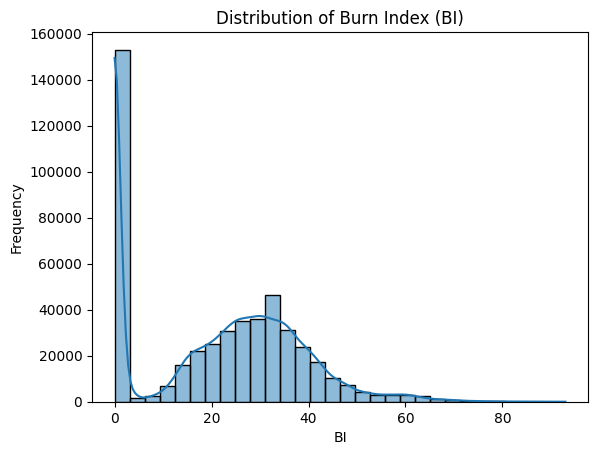

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(weather_df['bi'], bins=30, kde=True)
plt.title("Distribution of Burn Index (BI)")
plt.xlabel("BI")
plt.ylabel("Frequency")
plt.show()

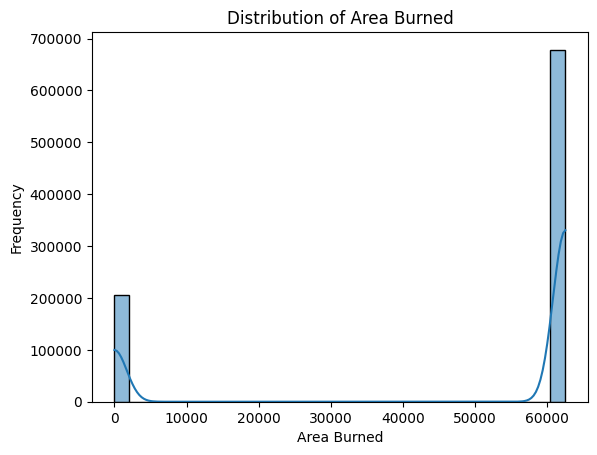

In [3]:
sns.histplot(emissions_df['area_burned'], bins=30, kde=True)
plt.title("Distribution of Area Burned")
plt.xlabel("Area Burned")
plt.ylabel("Frequency")
plt.show()

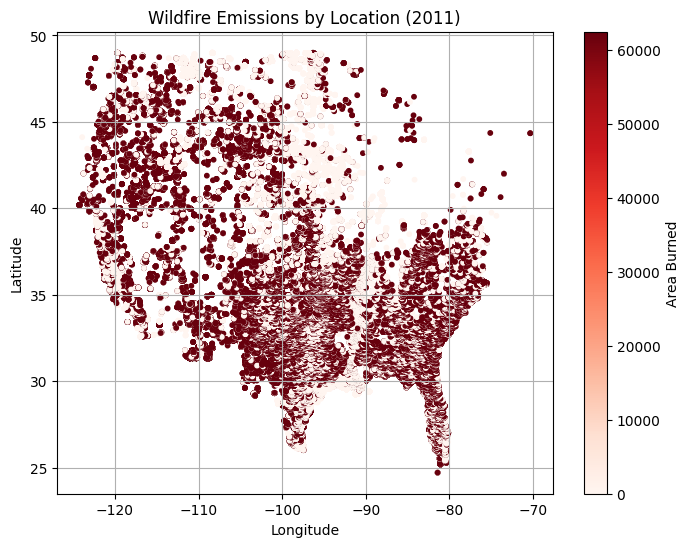

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(emissions_df['longitude'], emissions_df['latitude'], c=emissions_df['area_burned'], cmap='Reds', s=10)
plt.colorbar(label='Area Burned')
plt.title("Wildfire Emissions by Location (2011)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

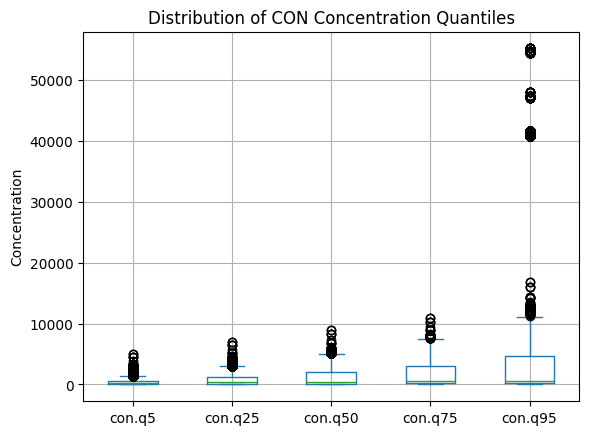

In [5]:
quantiles = ['con.q5', 'con.q25', 'con.q50', 'con.q75', 'con.q95']
emissions_df[quantiles].plot(kind='box', title='Distribution of CON Concentration Quantiles')
plt.ylabel("Concentration")
plt.grid(True)
plt.show()

In [6]:
weather_df[['latitude', 'longitude']].round(2).drop_duplicates().head()
emissions_df[['latitude', 'longitude']].round(2).drop_duplicates().head()


,latitude,longitude
0,25.19,-81.04
2,25.19,-81.03
7,25.20,-81.07
9,25.20,-81.04
19,25.20,-81.05


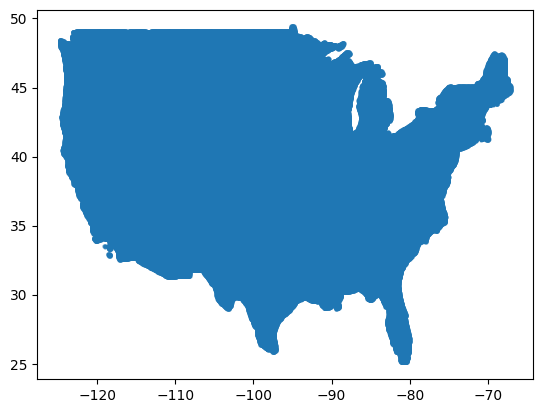

In [7]:
plt.scatter(weather_df['longitude'], weather_df['latitude'], s=5, label='Weather', alpha=0.5)

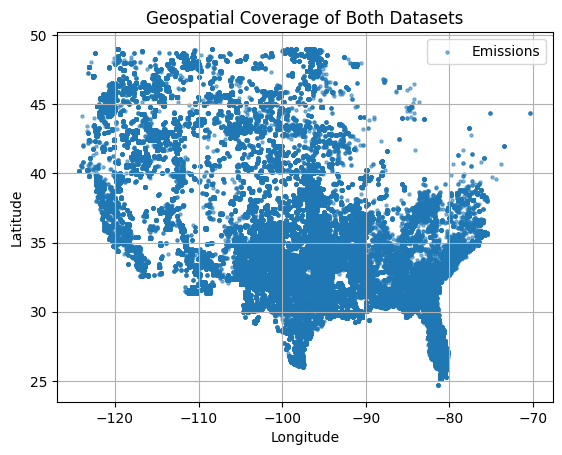

In [8]:
plt.scatter(emissions_df['longitude'], emissions_df['latitude'], s=5, label='Emissions', alpha=0.5)
plt.legend()
plt.title("Geospatial Coverage of Both Datasets")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

In [9]:
from scipy.spatial import cKDTree
import numpy as np

# Create arrays of coordinates
weather_coords = weather_df[['latitude', 'longitude']].to_numpy()
emissions_coords = emissions_df[['latitude', 'longitude']].to_numpy()

# Build tree from weather points (nearest-neighbor spatial join)
weather_tree = cKDTree(weather_coords)


In [10]:
# Get index of nearest weather point for each emissions point
distances, indices = weather_tree.query(emissions_coords, k=1)


In [11]:
# Get matching weather rows using the indices
nearest_weather = weather_df.iloc[indices].reset_index(drop=True)

# Merge them with emissions data
emissions_with_weather = pd.concat([emissions_df.reset_index(drop=True), nearest_weather], axis=1)
